In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
housing = pd.read_csv("Housing.csv")

In [3]:
house = housing.copy()

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
house.shape

(545, 13)

In [8]:
#find correlations between each variable
house.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<AxesSubplot:>

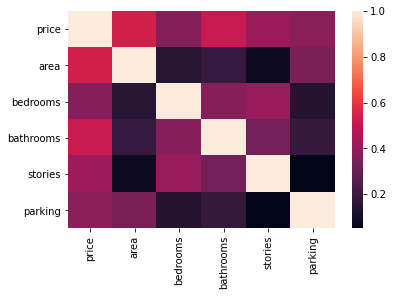

In [9]:
#Visualize correlations
house.corr()
sns.heatmap(house.corr().round(2))

<AxesSubplot:>

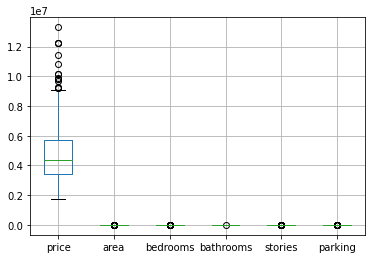

In [10]:
house.boxplot()

In [11]:
#Label encoding
#Drop one column when encoding
h2 = pd.get_dummies(house, drop_first=True)

In [12]:
h2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [13]:
h2.shape

(545, 14)

In [14]:
#Distinguish independent and dependent variables
x = h2.drop("price", axis = 1)
y = h2["price"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
scaler =  MinMaxScaler()

In [17]:
#Transforming the IV using MinMaxScaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
#Display transformed indepemdent data
x_train

array([[0.12419939, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15065441, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08382066, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.27248677, 0.4       , 0.5       , ..., 1.        , 0.        ,
        1.        ],
       [0.12280702, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33166249, 0.4       , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [19]:
#Fitting the multi linear regression to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
#Predicting the test set
y_pred = regressor.predict(x_test)

In [21]:
r2_score(y_test, y_pred)

0.6611214250980104

In [22]:
#Finding the root mean square error, and calculating the squar root to find the exact score
math.sqrt(mean_squared_error(y_test, y_pred))

988172.4399236252

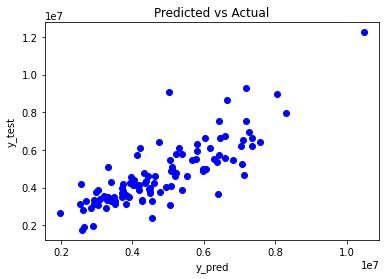

In [23]:
#Residual plot of model
plt.scatter(y_pred, y_test, color="blue")
plt.title("Predicted vs Actual")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()